In [1]:
%matplotlib inline
from __future__ import division, print_function
import numpy as np
from astropy.table import Table
import matplotlib.pyplot as plt
import sys, os
home = os.path.expanduser("~")+'/'
sys.path.append(home+'git/Python/user_modules/')
import match_coord

-------
## MOSDEF

In [4]:
cat = Table.read('/Users/roz18/Documents/Temp/desi-truth-table/mosdef_zcat.16aug2016.fits')
print(len(cat))
# mask = cat['Z_MOSFIRE']>0
# cat = cat[mask]
# print(len(cat))

1002


In [53]:
cat

FIELD,ID_V2,ID_V4,RA,DEC,Z_MOSFIRE,MASKNAME,TARGET
str7,int32,int32,float64,float64,float32,str6,int32
AEGIS,12870,36257,214.71847534,52.79872513,2.13066,ae2_03,1
AEGIS,13032,36492,214.71713257,52.79933167,-1.0,ae2_03,0
AEGIS,12793,36104,214.72564697,52.80254745,-1.0,ae2_03,1
AEGIS,12528,34966,214.73649597,52.80632401,1.41767,ae2_03,1
AEGIS,12046,33808,214.7375946,52.80190277,2.22544,ae2_03,1
AEGIS,11578,32354,214.74291992,52.79995728,2.13278,ae2_03,1
AEGIS,11491,31562,214.74472046,52.799366,-1.0,ae2_03,0
AEGIS,11299,31044,214.75021362,52.80117035,2.29454,ae2_03,1
AEGIS,10503,28799,214.75624084,52.79592896,2.21404,ae2_03,1


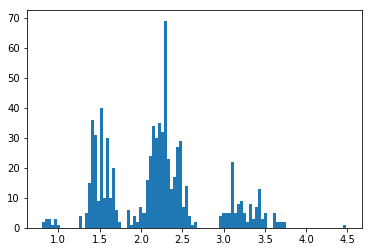

In [5]:
mask = cat['Z_MOSFIRE']>0
plt.hist(cat['Z_MOSFIRE'][mask], 100)
plt.show()

26 2.59%
True
True


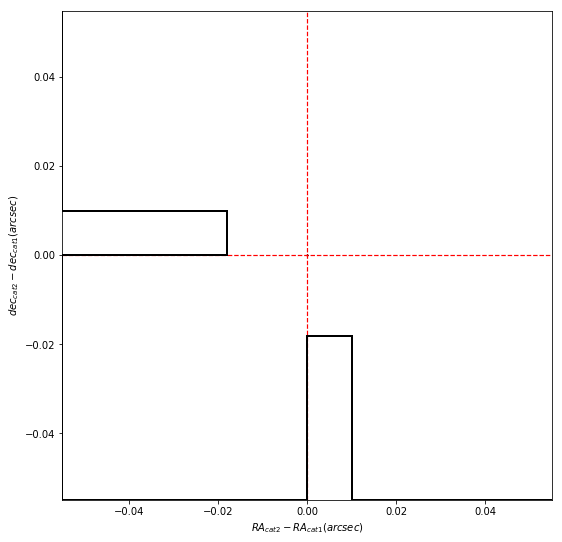

In [24]:
# select primary objects with Z_MOSFIRE>0
# mask = cat['TARGET']==1
mask = (cat['TARGET']==1) & (cat['Z_MOSFIRE']>0)
n_duplicates, idx1, idx2 = match_coord.match_self(cat['RA'][mask], cat['DEC'][mask], search_radius=1, 
                                                  return_indices=True, plot_q=True)
print(n_duplicates, '{:.2f}%'.format(n_duplicates/len(cat)*100))
print(np.all(cat['RA'][mask][idx1] - cat['RA'][mask][idx2]==0))
print(np.all(cat['DEC'][mask][idx1] - cat['DEC'][mask][idx2]==0))

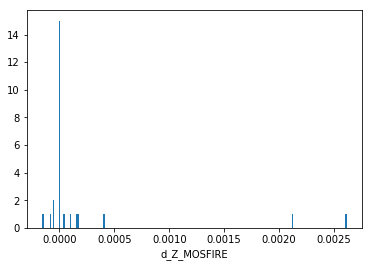

In [26]:
plt.hist(cat['Z_MOSFIRE'][mask][idx1] - cat['Z_MOSFIRE'][mask][idx2], bins=200)
plt.xlabel('d_Z_MOSFIRE')
plt.show()

__These 26 objects are indeed duplicates. Since there is no way to select the better observation and the redshift estimates are almost identical, we simply keep all of them in the catalog and let the catalog matching code remove the duplicates. __

__Output catalog for viewer:__

In [10]:
mask = (cat['TARGET']==1) & (cat['Z_MOSFIRE']>0)
cat1 = Table()
cat1['RA'] = cat['RA'][mask]
cat1['DEC'] = cat['DEC'][mask]
cat1.write('/Users/roz18/Documents/Temp/desi-truth-table/viewer/viewer-mosdef.fits')

-------
## FMOS-COSMOS

In [58]:
cat = Table.read('/Users/roz18/Documents/Temp/desi-truth-table/FMOS_COSMOS_v1.0.fits')
print(len(cat))
# mask = cat['ZSPEC']>0
# cat = cat[mask]
# print(len(cat))

1153


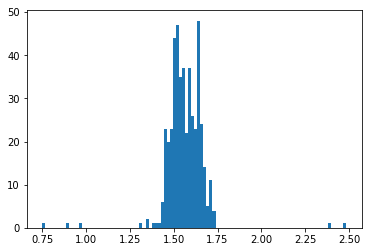

In [61]:
mask = cat['ZSPEC']>0
plt.hist(cat['ZSPEC'][mask], 100)
plt.show()

In [62]:
cat

FMOS_ID,RA,DEC,TYPE,ZSPEC,ZFLAG,DATE_OBS_HL,DATE_OBS_JL,OBS_HL,OBS_JL,DET_HALPHA,DET_NII6583,DET_HBETA,DET_OIII5007,FLUX_HALPHA,SN_HALPHA,FLUXLOSS_HALPHA,AMPL_HALPHA,AMPL_ERR_HALPHA,FWHM_HALPHA,FWHM_ERR_HALPHA,FLUX_NII6583,SN_NII6583,FLUXLOSS_NII6583,AMPL_NII6583,AMPL_ERR_NII6583,FWHM_NII6583,FWHM_ERR_NII6583,FLUX_HBETA,SN_HBETA,FLUXLOSS_HBETA,AMPL_HBETA,AMPL_ERR_HBETA,FWHM_HBETA,FWHM_ERR_HBETA,FLUX_OIII5007,SN_OIII5007,FLUXLOSS_OIII5007,AMPL_OIII5007,AMPL_ERR_OIII5007,FWHM_OIII5007,FWHM_ERR_OIII5007,UPLIM_HALPHA,UPLIM_NII6583,UPLIM_HBETA,UPLIM_OIII5007,APERCORR_HALPHA,APERCORR_HBETA
str21,float64,float64,int16,float64,int16,str8,str8,int16,int16,int16,int16,int16,int16,float64,float32,float64,float64,float64,float64,float64,float64,float32,float64,float64,float64,float64,float64,float64,float32,float64,float64,float64,float64,float64,float64,float32,float64,float64,float64,float64,float64,float32,float32,float32,float32,float32,float32
FMOS_J095943.6+014211,149.93179,1.7029167,0,1.67110011843,4,20130120,20130122,1,1,1,1,0,0,3.14819598028e-17,5.73,0.19778111182,1.55183774717e-18,2.86817894322e-19,325.840331401,56.483406702,1.03775659997e-17,2.66,0.083916462691,5.09985294123e-19,1.91450245406e-19,325.810610249,56.4885592411,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,3.74181e-17,2.14974,3.06189
FMOS_J095934.7+014251,149.8945,1.7141944,0,-999.0,0,20130120,--------,1,0,0,0,0,0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
FMOS_J095936.5+014251,149.902,1.71425,0,-999.0,0,20130120,--------,1,0,0,0,0,0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
FMOS_J095925.2+014254,149.85483,1.7150556,0,-999.0,0,20120313,--------,1,0,0,0,0,0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
FMOS_J095933.0+014258,149.88729,1.7160278,0,-999.0,0,20120313,--------,1,0,0,0,0,0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
FMOS_J095956.4+014311,149.98513,1.7196667,0,-999.0,0,20130120,--------,1,0,0,0,0,0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
FMOS_J095914.4+014328,149.81012,1.7244444,0,1.50422442882,1,20120313,20130122,1,1,1,0,0,0,5.45864767153e-17,2.37,0.632927101893,2.20788922388e-18,1.62958586866e-18,423.559174198,167.135814972,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,7.89147e-17,8.45918e-17,1.72878,1.95952
FMOS_J095937.9+014360,149.908,1.73325,0,-999.0,0,20120313,--------,1,0,0,0,0,0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
FMOS_J095910.7+014405,149.79475,1.73475,0,1.71175357807,3,20130120,--------,1,0,1,0,0,0,5.64807486636e-17,7.4,0.0929340803473,4.91574876745e-18,5.54825922094e-19,181.777489314,30.7454903373,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.

In [63]:
n_duplicates, idx1, idx2 = match_coord.match_self(cat['RA'], cat['DEC'], search_radius=1, 
                                                  return_indices=True, plot_q=True)
print(n_duplicates, '{:.2f}%'.format(n_duplicates/len(cat)*100))

0 0.00%


-------------------
## 3D-HST

In [13]:
cat = Table.read('/Users/roz18/Documents/Temp/desi-truth-table/3dhst.v4.1.5.master.fits.gz')
print(len(cat))
mask = (cat['z_max_grism']>0)
cat = cat[mask]
print(len(cat))

207967
79609


In [14]:
counts = Table()
counts['field'], counts['count'] = np.unique(cat['field'], return_counts=True)
counts

field,count
str6,int64
aegis,14465
cosmos,14968
goodsn,14387
goodss,17265
uds,18524


In [15]:
mask = cat['field']=='aegis'
cat = cat[mask]
print(len(cat))

14465


In [16]:
cat

phot_id,ra,dec,x,y,grism_id,ifield,field,pointings,npoint,jh_mag,z_spec,z_peak_phot,z_phot_l95,z_phot_l68,z_phot_u68,z_phot_u95,z_max_grism,z_peak_grism,z_grism_l95,z_grism_l68,z_grism_u68,z_grism_u95,f_cover,f_flagged,max_contam,int_contam,f_negative,flag1,flag2,use_zgrism,use_phot,z_best_s,z_best,z_best_l95,z_best_l68,z_best_u68,z_best_u95,number,linefit_grism_id,linefit_jh_mag,linefit_z_max_grism,s0,s0_err,s1,s1_err,Lya_FLUX,Lya_FLUX_ERR,Lya_SCALE,Lya_EQW,Lya_EQW_ERR,CIV_FLUX,CIV_FLUX_ERR,CIV_SCALE,CIV_EQW,CIV_EQW_ERR,MgII_FLUX,MgII_FLUX_ERR,MgII_SCALE,MgII_EQW,MgII_EQW_ERR,OII_FLUX,OII_FLUX_ERR,OII_SCALE,OII_EQW,OII_EQW_ERR,Hd_FLUX,Hd_FLUX_ERR,Hd_SCALE,Hd_EQW,Hd_EQW_ERR,Hg_FLUX,Hg_FLUX_ERR,Hg_SCALE,Hg_EQW,Hg_EQW_ERR,OIIIx_FLUX,OIIIx_FLUX_ERR,OIIIx_SCALE,OIIIx_EQW,OIIIx_EQW_ERR,HeII_FLUX,HeII_FLUX_ERR,HeII_SCALE,HeII_EQW,HeII_EQW_ERR,Hb_FLUX,Hb_FLUX_ERR,Hb_SCALE,Hb_EQW,Hb_EQW_ERR,OIII_FLUX,OIII_FLUX_ERR,OIII_SCALE,OIII_EQW,OIII_EQW_ERR,Ha_FLUX,Ha_FLUX_ERR,Ha_SCALE,Ha_EQW,Ha_EQW_ERR,SII_FLUX,SII_FLUX_ERR,SII_SCALE,SII_EQW,SII_EQW_ERR,SIII_FLUX,SIII_FLUX_ERR,SIII_SCALE,SIII_EQW,SIII_EQW_ERR,HeI_FLUX,HeI_FLUX_ERR,HeI_SCALE,HeI_EQW,HeI_EQW_ERR,HeIb_FLUX,HeIb_FLUX_ERR,HeIb_SCALE,HeIb_EQW,HeIb_EQW_ERR,NeIII_FLUX,NeIII_FLUX_ERR,NeIII_SCALE,NeIII_EQW,NeIII_EQW_ERR,NeV_FLUX,NeV_FLUX_ERR,NeV_SCALE,NeV_EQW,NeV_EQW_ERR,NeVI_FLUX,NeVI_FLUX_ERR,NeVI_SCALE,NeVI_EQW,NeVI_EQW_ERR,OI_FLUX,OI_FLUX_ERR,OI_SCALE,OI_EQW,OI_EQW_ERR,id_3,rf_z_best,z_type_3,rf_z_spec,DM,L153,nfilt153,L154,nfilt154,L155,nfilt155,L161,nfilt161,L162,nfilt162,L163,nfilt163,L156,nfilt156,L157,nfilt157,L158,nfilt158,L159,nfilt159,L160,nfilt160,L135,nfilt135,L136,nfilt136,L137,nfilt137,L138,nfilt138,L139,nfilt139,L270,nfilt270,L271,nfilt271,L272,nfilt272,L273,nfilt273,L274,nfilt274,L275,nfilt275,id_4,sfr,sfr_IR,sfr_UV,L_IR,L_UV,flag,sfr_z_best,z_type_4,f24tot,ef24tot,L_1600,L_2800,beta,id_5,z,ltau,metal,lage,Av,lmass,lsfr,lssfr,la2t,chi2
int64,float64,float64,float64,float64,str21,int64,str6,str20,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,int64,int64,float64,float64,float64,float64,float64,int64,str22,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,int64,float64,float64,float64,int64,float64,int64,float64,int64,float64,int64,float64,int64,float64,int64,float64,int64,float64,int64,float64,int64,float64,int64,float64,int64,float64,int64,float64,int64,float64,int64,float64,int64,float64,int64,float64,int64,float64,int64,float64,int64,float64,int64,float64,int64,float64,int64,int64,float64,float64,float64,float64,float64,int64,float64,int64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
2,215.09658813,52.91805267,16473.2,3150.2,aegis-26-G141_00002,1,aegis,26,1,18.873,-1.0,0.01,0.01,0.011,0.024,0.025,1.39768,1.39842,1.39461,1.39591,1.39993,1.40319,0.36,0.13,0.62,0.43,0.0,0,1,0,0,3,0.01,0.01,0.011,0.024,0.025,2,aegis-26-G141_00002,18.873,1.39768,2.072,0.033,1.093,0.232,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-

In [17]:
# mask = (cat['z_max_grism']>0)
# print(np.sum(mask))

t = Table.read('/Users/roz18/Documents/Temp/desi-truth-table/3D-HST/aegis_3dhst_v4.1.5_catalogs/aegis_3dhst.v4.1.5.zfit.linematched.fits')
print(len(t))
mask = (t['z_max_grism']>0)
t = t[mask]
print(len(t))

41200
14465


Since the line-matched catalog has the same number of objects as the master catalog and there are no duplicates in the line-matched catalog, the master catalog also don't have any duplicates. 

1529 10.57%


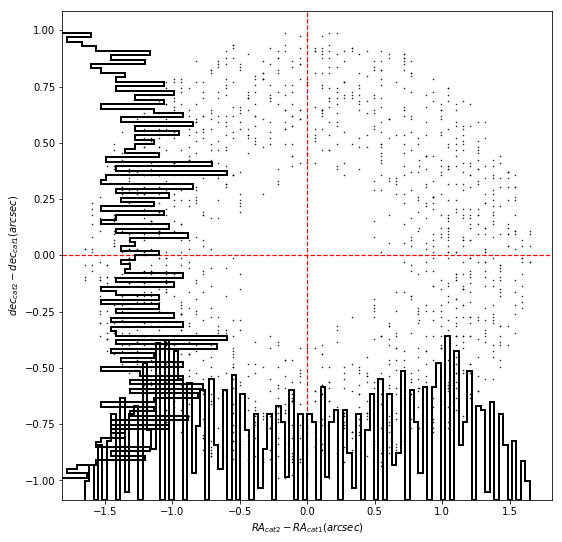

In [19]:
n_duplicates, idx1, idx2 = match_coord.match_self(cat['ra'], cat['dec'], search_radius=1., 
                                                  return_indices=True, plot_q=True)
print(n_duplicates, '{:.2f}%'.format(n_duplicates/len(cat)*100))

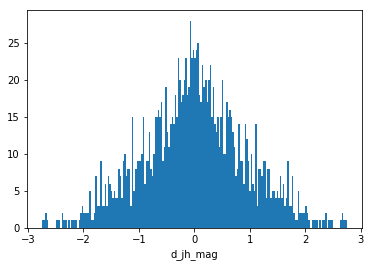

In [20]:
plt.hist(cat['jh_mag'][idx1] - cat['jh_mag'][idx2], bins=200)
plt.xlabel('d_jh_mag')
plt.show()

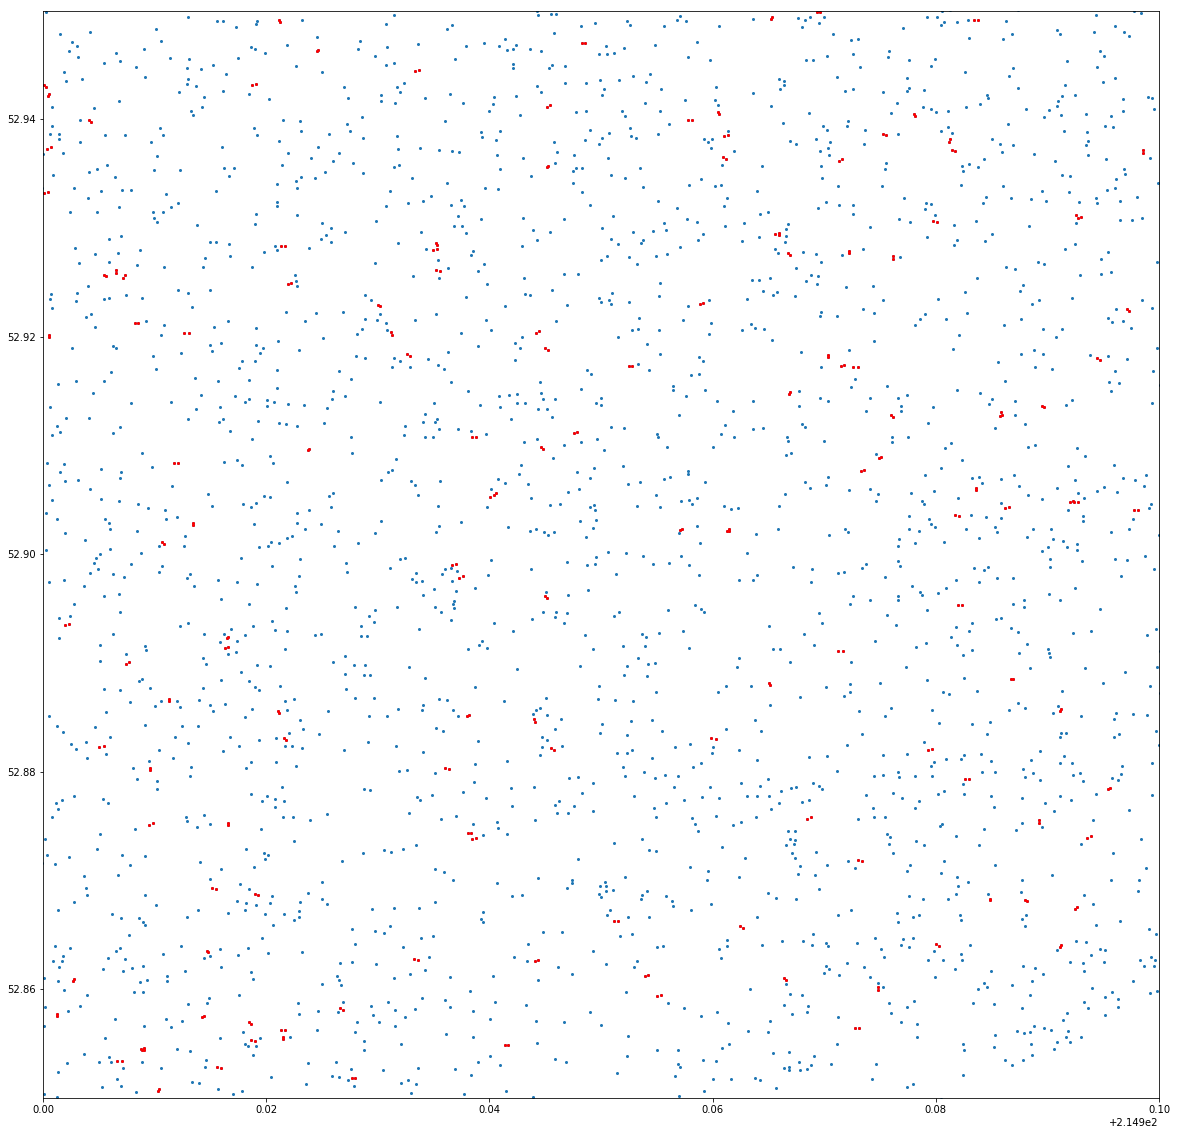

In [22]:
n_duplicates, idx1, idx2 = match_coord.match_self(cat['ra'], cat['dec'], search_radius=1, 
                                                  return_indices=True, plot_q=False)

plt.figure(figsize=(20, 20))
plt.plot(cat['ra'], cat['dec'], '.', markersize=4)
plt.plot(cat['ra'][idx1], cat['dec'][idx1], 'r.', markersize=4)
plt.axis([214.9, 215.0, 52.85, 52.95])
plt.show()

DEEP2+DEEP3 objects:

In [76]:
t = Table.read('/Users/roz18/Downloads/alldeep.egs.uniq.2012jun13.fits.gz')

144 0.60%


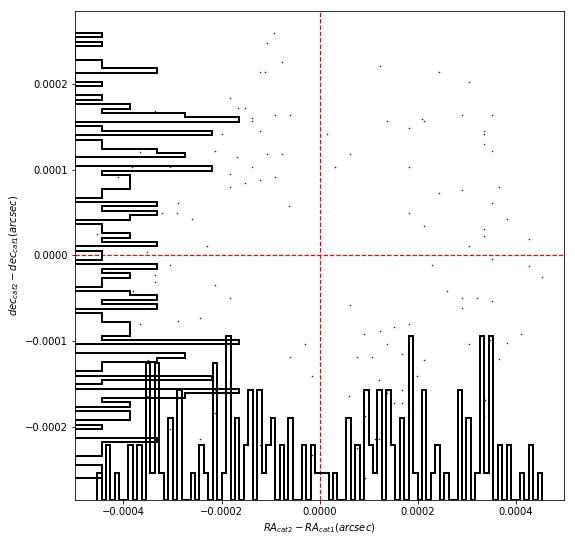

In [77]:
n_duplicates, idx1, idx2 = match_coord.match_self(t['RA'], t['DEC'], search_radius=1, 
                                                  return_indices=True, plot_q=True)
print(n_duplicates, '{:.2f}%'.format(n_duplicates/len(t)*100))

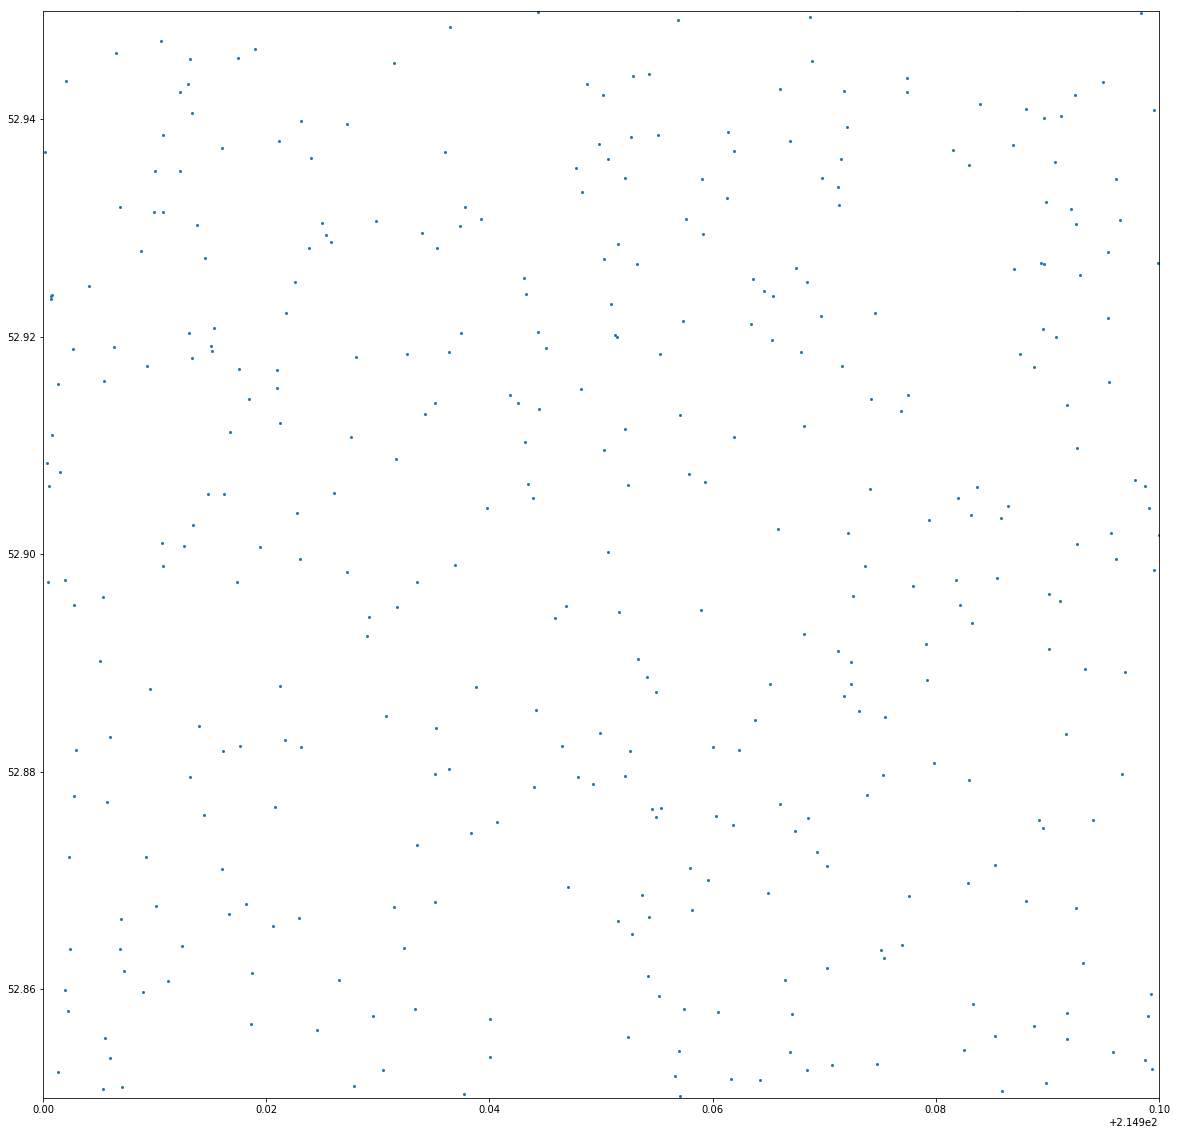

In [78]:
plt.figure(figsize=(20, 20))
plt.plot(t['RA'], t['DEC'], '.', markersize=4)
plt.axis([214.9, 215.0, 52.85, 52.95])
plt.show()

__Output fits file for Legacy Survey Viewer__

In [14]:
rectangle = [214.9, 215.0, 52.85, 52.95]

mask = (cat['ra']>rectangle[0]) & (cat['ra']<rectangle[1]) & \
       (cat['dec']>rectangle[2]) & (cat['dec']<rectangle[3])

mask &= cat['field']=='aegis'
cat1 = Table()
cat1['ra'] = cat['ra'][mask]
cat1['dec'] = cat['dec'][mask]
cat1.write('/Users/roz18/Documents/Temp/desi-truth-table/3dhst-part-of-aegis.fits')

-------
## GAMA

In [69]:
cat = Table.read('/Users/roz18/Documents/Data/desi-truth-table/GAMA-DR2-SpecObj.fits')

In [4]:
cat

CATAID,GAMA_NAME,IC_FLAG,N_SPEC,N_GAMA_SPEC,DIST,SPECID,SURVEY,SURVEY_CODE,RA,DEC,WMIN,WMAX,Z,NQ,PROB,FILENAME,URL,URL_IMG
,,,,,arcsec,,,,deg,deg,A,A,,,,,,
int32,str23,int16,int16,int16,float32,str33,str9,int16,float64,float32,float32,float32,float32,int16,float32,str67,str88,str92
6802,GAMAJ113601.43+004315.3,3,1,1,0.07,G12_Y3_017_187,GAMA,5,174.006,0.72093,3727.71,8857.67,0.05054,4,0.987,/GAMA/dr2/data/spectra/gama/reduced_08/1d/G12_Y3_017_187.fit,http://www.gama-survey.org/dr2/data/spectra/gama/reduced_08/1d/G12_Y3_017_187.fit,http://www.gama-survey.org/dr2/data/spectra/gama/reduced_08/1d/png/G12_Y3_017_187.png
6806,GAMAJ113605.47+004221.3,3,1,1,0.07,G12_Y1_AN1_238,GAMA,5,174.02279,0.70594,3727.79,8856.74,0.33119,4,0.987,/GAMA/dr2/data/spectra/gama/reduced_08/1d/G12_Y1_AN1_238.fit,http://www.gama-survey.org/dr2/data/spectra/gama/reduced_08/1d/G12_Y1_AN1_238.fit,http://www.gama-survey.org/dr2/data/spectra/gama/reduced_08/1d/png/G12_Y1_AN1_238.png
6808,GAMAJ113624.17+003932.0,3,1,1,0.07,G12_Y1_AN1_235,GAMA,5,174.10071,0.65891,3727.79,8856.74,0.22979,4,1.0,/GAMA/dr2/data/spectra/gama/reduced_08/1d/G12_Y1_AN1_235.fit,http://www.gama-survey.org/dr2/data/spectra/gama/reduced_08/1d/G12_Y1_AN1_235.fit,http://www.gama-survey.org/dr2/data/spectra/gama/reduced_08/1d/png/G12_Y1_AN1_235.png
6821,GAMAJ113636.75+004855.5,3,1,1,0.14,G12_Y1_AN1_254,GAMA,5,174.15312,0.81543,3727.79,8856.74,0.00375,4,0.987,/GAMA/dr2/data/spectra/gama/reduced_08/1d/G12_Y1_AN1_254.fit,http://www.gama-survey.org/dr2/data/spectra/gama/reduced_08/1d/G12_Y1_AN1_254.fit,http://www.gama-survey.org/dr2/data/spectra/gama/reduced_08/1d/png/G12_Y1_AN1_254.png
6826,GAMAJ113644.38+004232.5,3,3,0,0.04,79597815109517312,SDSS,1,174.18493,0.70906,3792.28,9221.47,0.07278,5,0.993,/GAMA/dr2/data/spectra/sdss/spSpec-51658-0282-538.fit,http://www.gama-survey.org/dr2/data/spectra/sdss/spSpec-51658-0282-538.fit,http://www.gama-survey.org/dr2/data/spectra/sdss/png/spSpec-51658-0282-538.png
6830,GAMAJ113707.32+004221.8,3,1,1,0.04,G12_Y1_AN1_255,GAMA,5,174.2805,0.70608,3727.79,8856.74,0.11397,4,0.987,/GAMA/dr2/data/spectra/gama/reduced_08/1d/G12_Y1_AN1_255.fit,http://www.gama-survey.org/dr2/data/spectra/gama/reduced_08/1d/G12_Y1_AN1_255.fit,http://www.gama-survey.org/dr2/data/spectra/gama/reduced_08/1d/png/G12_Y1_AN1_255.png
6837,GAMAJ113712.66+004723.9,3,1,1,0.14,G12_Y1_AN1_260,GAMA,5,174.30275,0.78998,3727.79,8856.74,0.07424,4,0.987,/GAMA/dr2/data/spectra/gama/reduced_08/1d/G12_Y1_AN1_260.fit,http://www.gama-survey.org/dr2/data/spectra/gama/reduced_08/1d/G12_Y1_AN1_260.fit,http://www.gama-survey.org/dr2/data/spectra/gama/reduced_08/1d/png/G12_Y1_AN1_260.png
6838,GAMAJ113713.33+004725.2,3,1,1,0.04,G12_Y3_017_181,GAMA,5,174.30554,0.79034,3727.71,8857.67,0.07453,4,0.987,/GAMA/dr2/data/spectra/gama/reduced_08/1d/G12_Y3_017_181.fit,http://www.gama-survey.org/dr2/data/spectra/gama/reduced_08/1d/G12_Y3_017_181.fit,http://www.gama-survey.org/dr2/data/spectra/gama/reduced_08/1d/png/G12_Y3_017_181.png


In [5]:
match_coord.match_self(cat['RA'], cat['DEC'])

0

In [75]:
print(len(cat))
print(np.sum(cat['NQ']>=4))

72213
69151


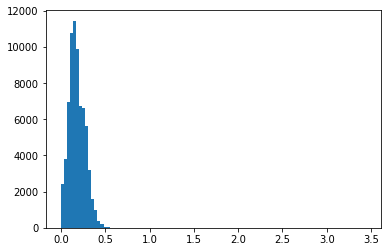

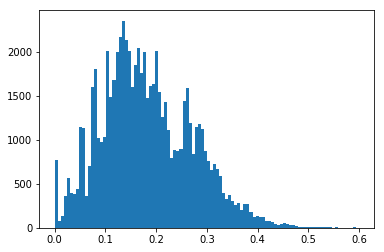

In [76]:
mask = cat['NQ']>2
plt.hist(cat['Z'][mask], bins=100)
plt.show()
plt.hist(cat['Z'][mask], bins=100, range=(0, 0.6))
plt.show()

---------
## WiggleZ

In [65]:
cat = Table.read('/Users/roz18/Documents/Data/desi-truth-table/wigglez_dr1.fits')

In [4]:
cat

ID,RA,DEC,Redshift,Qop,u_SDSS,g_SDSS,r_SDSS,i_SDSS,z_SDSS,g_RCS2,r_RCS2,z_RCS2,NUV,FUV
str22,float64,float64,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float64,float64
R00J231825678-03140446,349.607045833,-3.2345166667,0.48943,4.0,nan,22.7328,22.276,nan,22.1787,nan,nan,nan,22.6946,24.1525
R00J231828706-03173256,349.619608333,-3.2923777778,0.49622,4.0,nan,21.9271,21.2691,nan,21.0104,nan,nan,nan,22.1115,23.2001
R00J231830024-03153696,349.6251,-3.2602694444,1.20133,3.0,nan,22.5771,21.6691,nan,21.0004,nan,nan,nan,22.0686,24.4675
R00J231832084-03115511,349.633683333,-3.1986694444,0.60838,4.0,nan,22.3819,21.4553,nan,20.6783,nan,nan,nan,22.7983,25.2816
R00J231838854-03170556,349.661891667,-3.284875,0.60817,4.0,nan,22.0233,21.3436,nan,20.9228,nan,nan,nan,22.4853,24.6977
R00J231838971-03093084,349.662379167,-3.1585888889,0.84344,5.0,nan,21.9693,21.7634,nan,21.1673,nan,nan,nan,21.625,24.1887
R00J231839596-03192788,349.664983333,-3.3244111111,0.47449,4.0,nan,21.7825,21.053,nan,20.6825,nan,nan,nan,22.1074,23.0522
R00J231852134-03080770,349.717254167,-3.1354888889,0.48232,5.0,nan,22.1208,21.2846,nan,20.8379,nan,nan,nan,23.0836,24.6687
R00J231852752-03320556,349.7198,-3.534875,0.63239,4.0,nan,22.2183,21.3572,nan,20.6247,nan,nan,nan,22.3545,99.0


In [66]:
mask = (cat['Qop']==4) | (cat['Qop']==5)
# mask = np.ones(len(cat), dtype=bool)
np.sum(mask)

55269

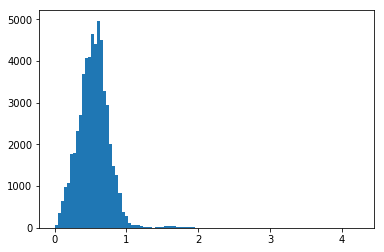

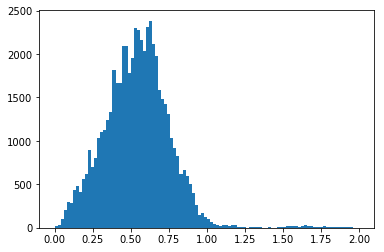

In [68]:
plt.hist(cat['Redshift'][mask], 100)
plt.show()

plt.hist(cat['Redshift'][mask], 100, range=(0, 2))
plt.show()

260


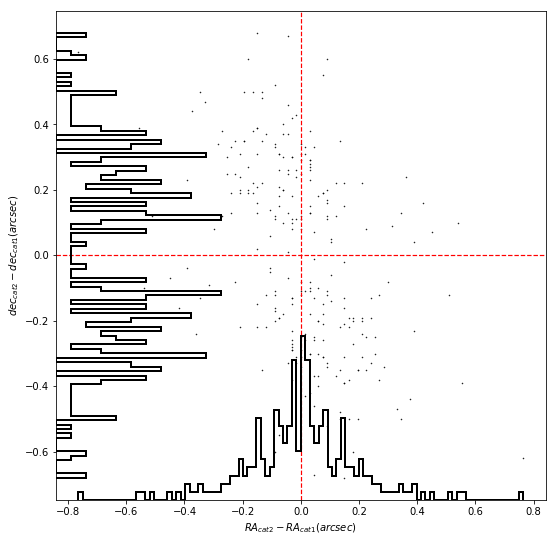

In [52]:
n_dup, idx1, idx2 = match_coord.match_self(cat['RA'][mask], cat['DEC'][mask], search_radius=1, plot_q=True, return_indices=True)
print(n_dup)

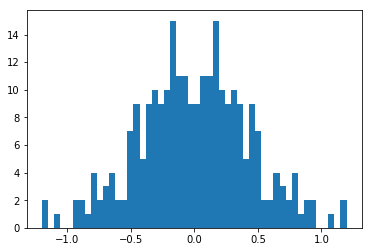

In [53]:
plt.hist(cat['r_SDSS'][mask][idx1] - cat['r_SDSS'][mask][idx2], 50)
plt.show()

In [54]:
np.sum(np.abs(cat['Redshift'][mask][idx1] - cat['Redshift'][mask][idx2])<0.01)/len(idx2)

0.98461538461538467

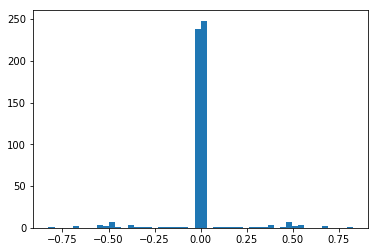

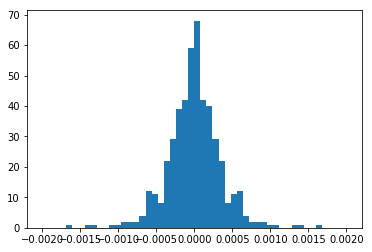

In [43]:
plt.hist(cat['Redshift'][mask][idx1] - cat['Redshift'][mask][idx2], 50)
plt.show()

plt.hist(cat['Redshift'][mask][idx1] - cat['Redshift'][mask][idx2], 50, range=(-0.002, 0.002))
plt.show()